### Disney recommendation modelling

Disney+ is another one of the most popular media and video streaming platforms. They have close to 1300 movies or tv shows available on their platform, as of mid-2021, they have over 116M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Disney+, along with details such as - show_id, type, title, country, cast, date_added, directors, ratings, release year and duration.


** Dataset Info - ** The Dataset contains 1,368 rows and 12 columns, 1 ID Column and ther s described below.

• **show_id -** Unique ID
• **type -** Is it a Movie or a TV Show
• **title -** Name of the movie / show
• **director -** Directors of the movie / tv show
• **cast -** Main cast of the movie / show
• **country -** Country of production
• **date_added -** Date added on Disney+
• **release_year -** Original Release Year of the movie / tv show
• **rating -** Rating of the movie / tv show
• **duration** - Total duration of the movie / tv show

**Goal**
The goal of this project is to develop a recommendation system for Disney Plus, enhancing user experience by efficiently helping them discover new shows and movies of their interest. Currently, users may struggle to find content that matches their personal preferences due to the extensive library available. An effective recommendation system can not only increase user engagement but also improve overall satisfaction by facilitating personalized discovery of relevant content.

**ML Problem Statement**
The associated ML problem is to develop a recommendation model capable of analyzing the viewing history and preferences of Disney Plus users to predict and recommend new shows and movies they are likely to enjoy. This is a collaborative filtering-based item recommendation problem aimed at delivering accurate and relevant recommendations to enhance user discovery experience on the streaming service.

## Importing the libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import lets_plot as lp


## Loading the dataset :

In [2]:
file_path = r'C:\Users\Bianca\Documents\GitHub\disney_recommendation\disney_plus_titles.csv'
disney_plus = pd.read_csv(file_path)

In [3]:
disney_plus.head(3) # Exibe as primeiras 3 linhas por padrão

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...


In [4]:
disney_plus.shape # Retorna uma tupla (número de linhas, número de colunas)

(1368, 12)

In [5]:
disney_plus.dtypes  # Retorna os tipos de dados de cada coluna

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
disney_plus.nunique() # Retorna o número de valores únicos em cada coluna

show_id         1368
type               2
title           1368
director         578
cast            1132
country           87
date_added       150
release_year      90
rating             9
duration         156
listed_in        317
description     1366
dtype: int64

In [7]:
disney_plus.isnull().sum() # Finding Missing Values

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

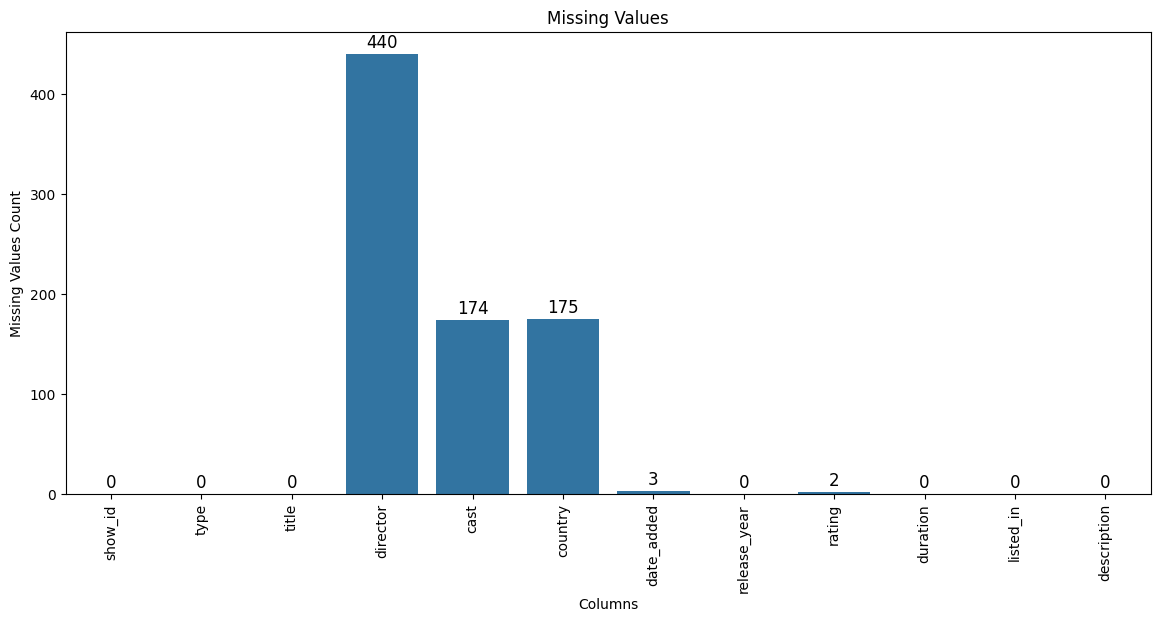

In [8]:
missing_values_count = disney_plus.isnull().sum()

# Configura o tamanho da figura
plt.figure(figsize=(14, 6))

# Cria o gráfico de barras
sns.barplot(x=missing_values_count.index, y=missing_values_count)

# Adiciona título ao gráfico
plt.title("Missing Values")

# Configurações adicionais para o eixo x, eixo y e rotação dos rótulos no eixo x
plt.xlabel("Columns")
plt.ylabel("Missing Values Count")
plt.xticks(rotation=90)

# Adiciona os valores numéricos acima das barras
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2,
            int(height), fontsize=12, ha='center', va='bottom')

# Exibe o gráfico
plt.show()
